In [7]:
import zarr
import numpy as np
import matplotlib.pyplot as plt

In [8]:
root = zarr.open('trajectories5.zarr', mode='r')


1000


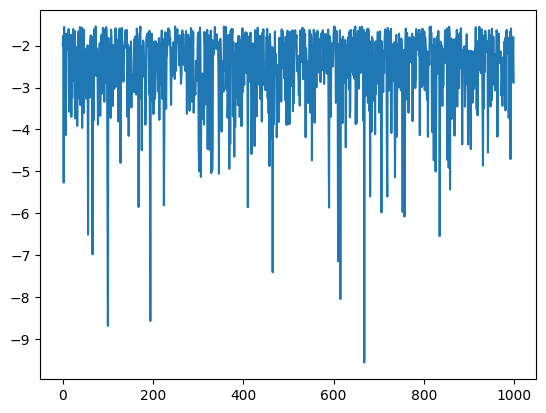

In [9]:
# plot the log_prob for the first 1000
log_prob = root['log_prob'][:1000]
print(len(log_prob))
plt.plot(log_prob)
plt.show()

In [10]:
print(root["new_rewards"][:10])

KeyError: 'new_rewards'

(702926, 2)


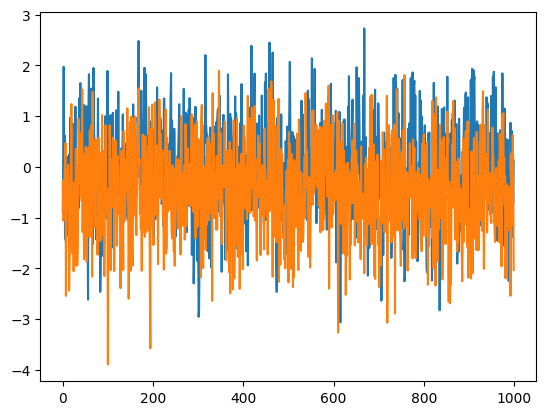

In [12]:
print(root["actions"].shape)
# plot the first 1000 actions
plt.plot(root["actions"][:1000,0])
plt.plot(root["actions"][:1000,1])
plt.show()

In [9]:
# count truncated
print(np.sum(root["done"]))

191


In [10]:
print(root["observations"].keys())

KeysView(<zarr.hierarchy.Group '/observations' read-only>)


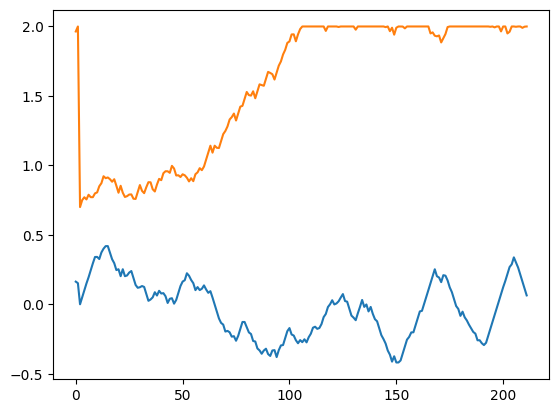

In [72]:
plt.plot(root["observations"]["previous_action"][288:500])
plt.show()

In [13]:
root["collision"]

<zarr.core.Array '/collision' (352236,) float32 read-only>

In [14]:
np.sum(root["collision"][:])

123.0

In [15]:
np.unique(root['model_name'])

array(['det', 'min_acti', 'min_lida', 'raceline', 'steering', 'td_progr',
       'vel_chan', 'velocity'], dtype='<U8')

velocity


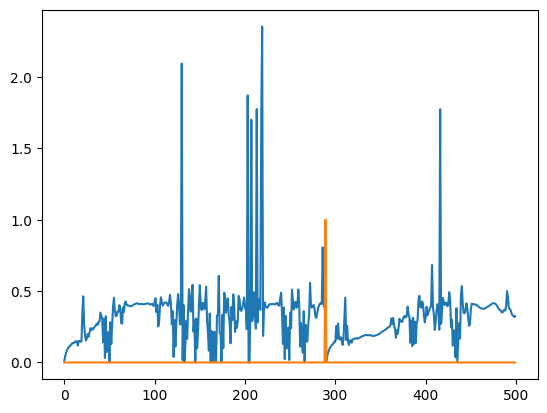

In [16]:
# Access the model_name dataset
model_names = root['model_name'] # ['model_name']
print(model_names[0])
# plot the first 500 rewards
plt.plot(root['rewards'][:500])
plt.plot(root["done"][0:500])

In [17]:
def get_change_indices(model_names):
    change_indices = []
    current_name = model_names[0]
    for idx, name in enumerate(model_names):
        if name != current_name:
            change_indices.append(idx)
            current_name = name
    return change_indices
change_indices = get_change_indices(model_names) + [len(model_names)]

In [18]:
print(change_indices)

[50172, 100598, 150840, 200941, 251283, 301611, 352232, 352236]


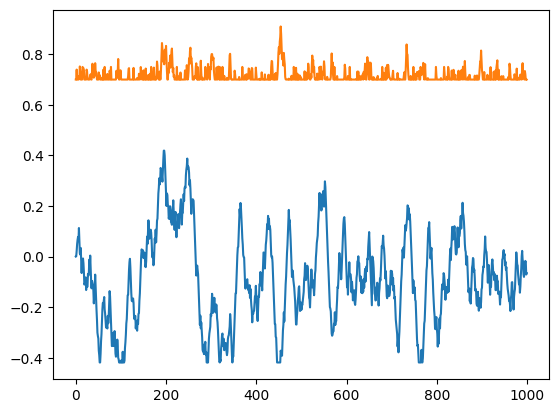

In [19]:
plt.plot(root["observations"]["previous_action"][change_indices[0]:change_indices[0]+1000])
plt.show()

In [20]:
def plot_heatmap(start_idx, end_idx):
    # Extract relevant data
    x_data = poses_x[start_idx:end_idx]
    y_data = poses_y[start_idx:end_idx]

    # Create a 2D histogram (heatmap)
    plt.hist2d(x_data, y_data, bins=(100, 100), cmap=plt.cm.jet, range=[[-5, 2.5], [-1.5, 9]])
    plt.colorbar()
    plt.xlabel('poses_x')
    plt.ylabel('poses_y')
    plt.title(f'Heatmap for model: {model_names[start_idx]}')
    # plt size y from 0 to 0.4
    plt.show()


In [21]:
# print the model of each change idx
print([model_names[i-1] for i in change_indices])

['velocity', 'raceline', 'min_lida', 'td_progr', 'steering', 'min_acti', 'vel_chan', 'det']


In [22]:

poses_x = root['observations']['poses_x']
poses_y = root['observations']['poses_y']

In [23]:
print(root['observations']["previous_action"][90:100])

[[ 0.0641584   2.        ]
 [ 0.07446034  2.        ]
 [ 0.03921188  1.98191883]
 [ 0.05005945  2.        ]
 [ 0.05899999  2.        ]
 [ 0.04205399  1.95      ]
 [-0.00794601  1.93391507]
 [-0.05794601  1.98391507]
 [-0.10794601  2.        ]
 [-0.13889525  2.        ]]


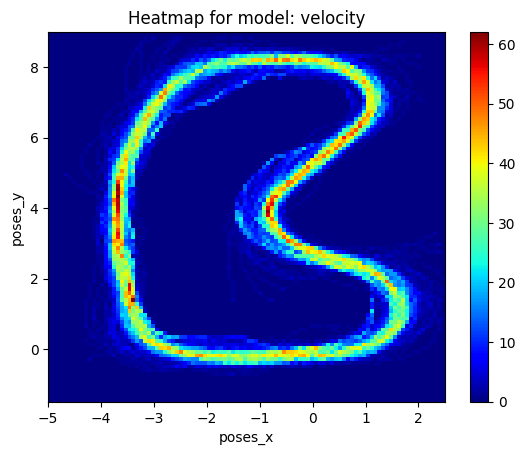

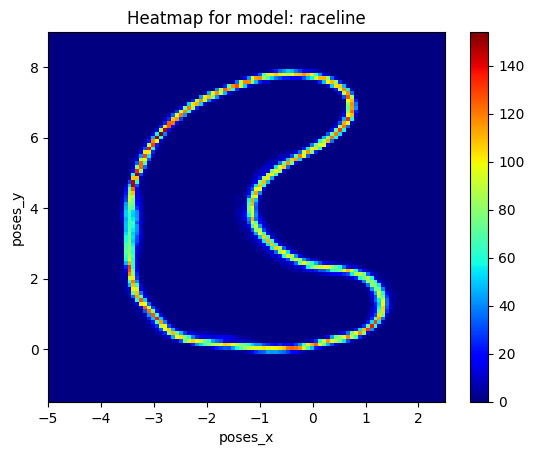

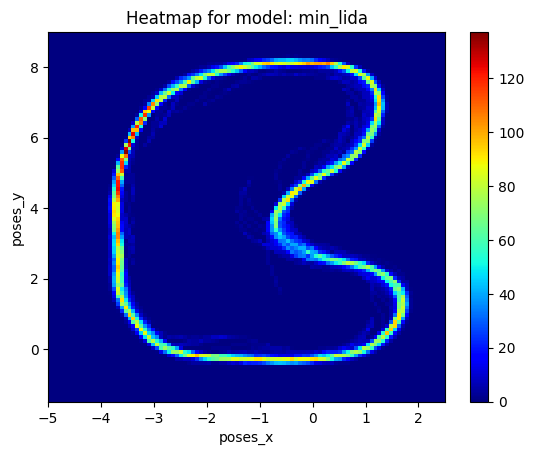

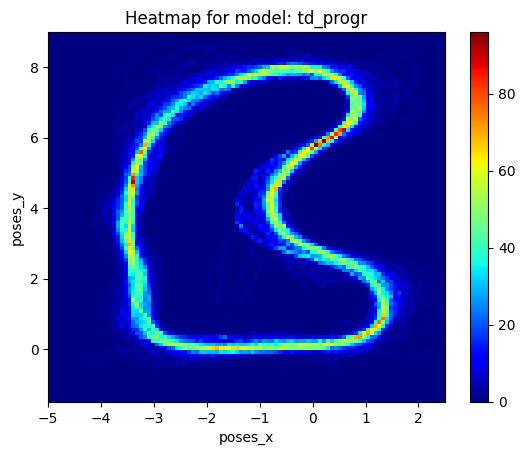

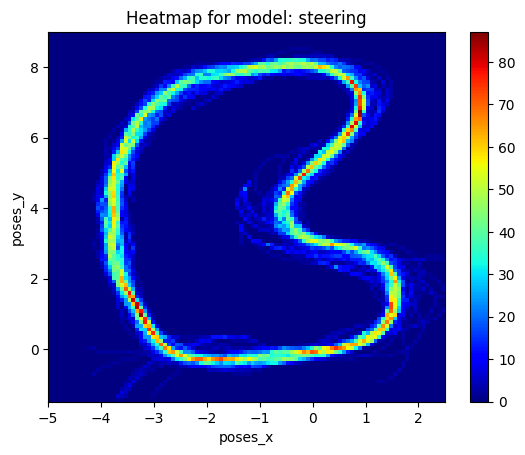

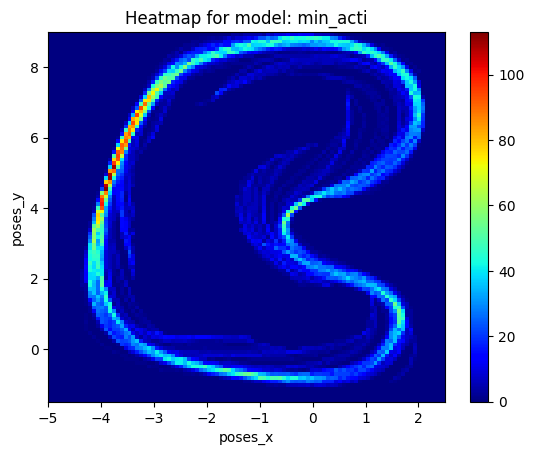

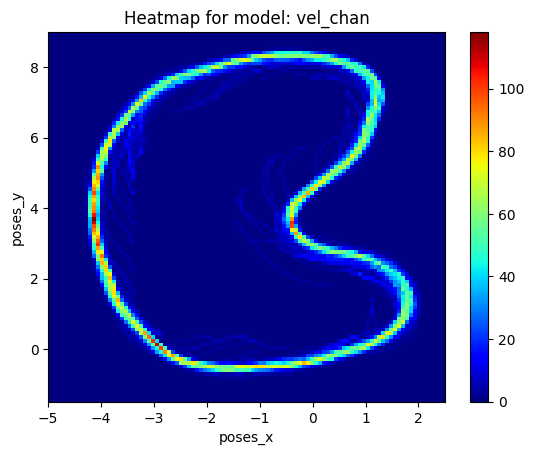

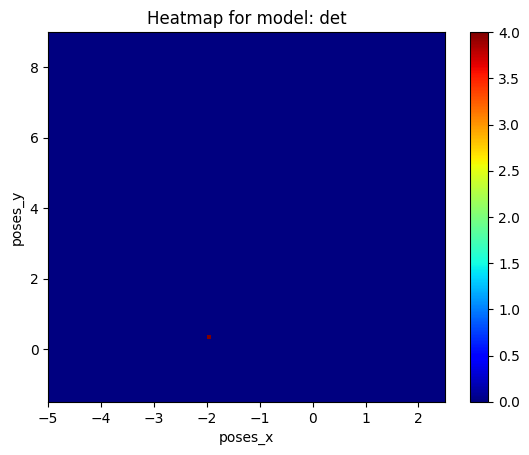

In [24]:

# Now, let's plot for each segment
start_idx = 0
for end_idx in change_indices:
    plot_heatmap(start_idx, end_idx)
    start_idx = end_idx

In [25]:
def plot_comparison_heatmap(start_idx1, end_idx1, start_idx2, end_idx2):
    # Extract relevant data for the first set
    x_data1 = poses_x[start_idx1:end_idx1]
    y_data1 = poses_y[start_idx1:end_idx1]

    # Extract relevant data for the second set
    x_data2 = poses_x[start_idx2:end_idx2]
    y_data2 = poses_y[start_idx2:end_idx2]

    # Define range and bins
    range_val = [[-5, 2.5], [-1.5, 9]]
    bins_val = (100, 100)
    
    # Create the first heatmap
    plt.hist2d(x_data1, y_data1, bins=bins_val, cmap=plt.cm.Reds, range=range_val, alpha=0.5)
    
    # Create the second heatmap overlayed on top of the first
    plt.hist2d(x_data2, y_data2, bins=bins_val, cmap=plt.cm.Blues, range=range_val, alpha=0.5)
    
    plt.colorbar()
    plt.xlabel('poses_x')
    plt.ylabel('poses_y')
    plt.title(f'Comparison between {model_names[start_idx1]} and {model_names[start_idx2]}')
    #plt.ylim(0, 0.4)
    plt.show()

In [26]:
print([model_names[i-1] for i in change_indices])

['velocity', 'raceline', 'min_lida', 'td_progr', 'steering', 'min_acti', 'vel_chan', 'det']


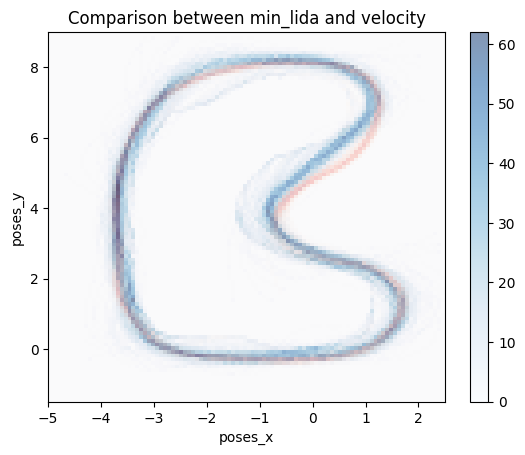

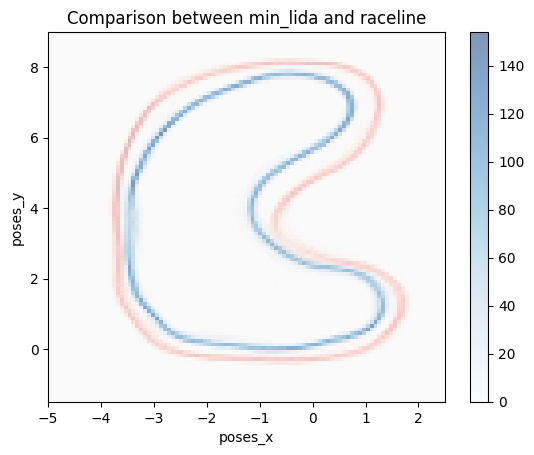

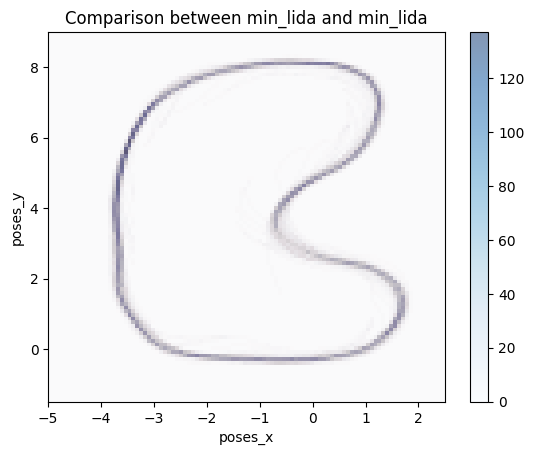

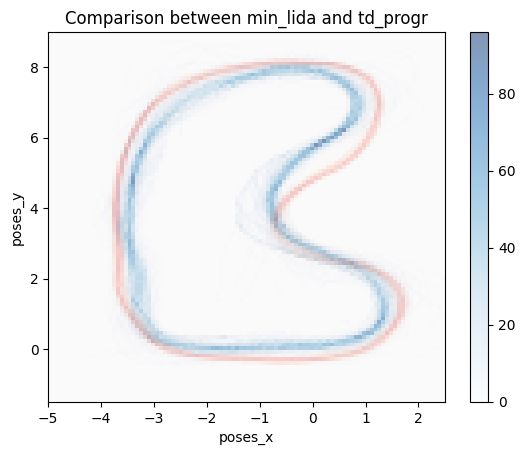

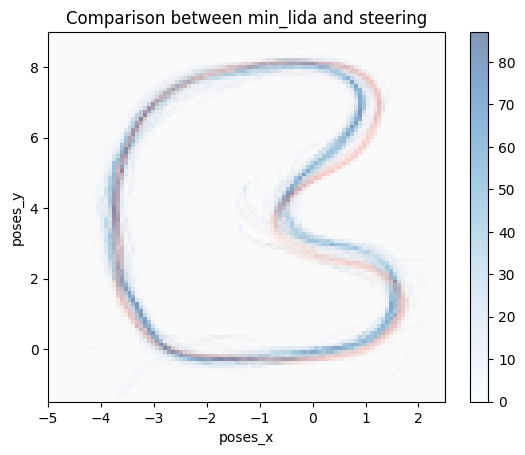

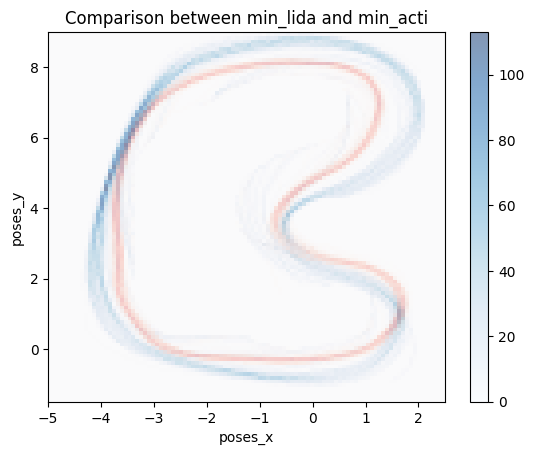

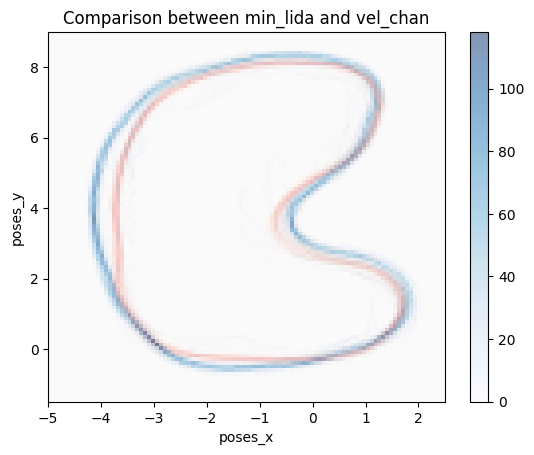

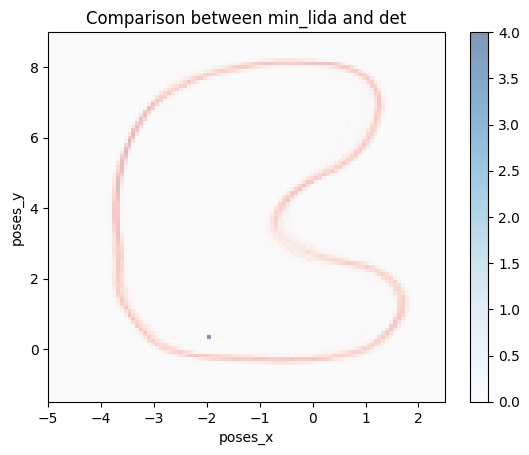

In [27]:
# Call the function
#plot_comparison_heatmap(0, change_indices[1], change_indices[1], change_indices[2])
#plot_comparison_heatmap(0, change_indices[1], change_indices[1], change_indices[2])
# compare each model with velocity
start_idx = 0
for end_idx in change_indices:
    plot_comparison_heatmap(change_indices[1], change_indices[2], start_idx, end_idx)
    start_idx = end_idx

In [28]:
def plot_average_velocity_heatmap(start_idx, end_idx, poses_x, poses_y, velocities, resolution=0.001):
    # Extract relevant data
    x_data = poses_x[start_idx:end_idx]
    y_data = poses_y[start_idx:end_idx]
    vel_data = velocities[start_idx:end_idx]
    
    # Dictionary to store unique positions and their velocities
    pos_vel_map = {}
    for x, y, v in zip(x_data, y_data, vel_data):
        # Round x and y values based on resolution
        x_bin = round(x / resolution) * resolution
        y_bin = round(y / resolution) * resolution
        
        if (x_bin, y_bin) in pos_vel_map:
            pos_vel_map[(x_bin, y_bin)].append(v)
        else:
            pos_vel_map[(x_bin, y_bin)] = [v]

    # Average velocities for each position
    avg_velocities = [np.mean(v) for v in pos_vel_map.values()]
    
    #alpha
    max_occurrences = max([len(v) for v in pos_vel_map.values()])
    alpha_values = [len(v) / max_occurrences for v in pos_vel_map.values()]


    # Unpack x and y values from the keys
    x_vals, y_vals = zip(*pos_vel_map.keys())
    
    # Create scatter plot with colormap
    plt.scatter(x_vals, y_vals, c=avg_velocities, cmap=plt.cm.jet, vmax=2, alpha=alpha_values)
    plt.colorbar()
    plt.xlabel('poses_x')
    plt.ylabel('poses_y')
    plt.xlim([-5, 2.5])
    plt.ylim([-1.5, 9])
    plt.title(f'Average Velocity Heatmap {model_names[start_idx]}') 
    plt.show()

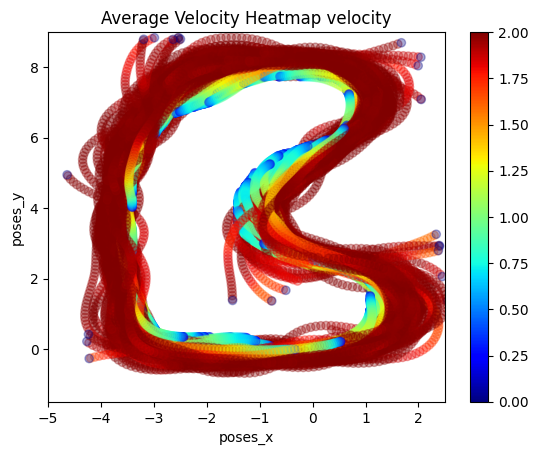

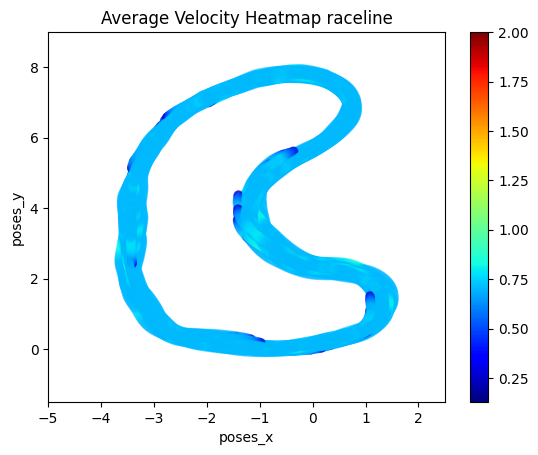

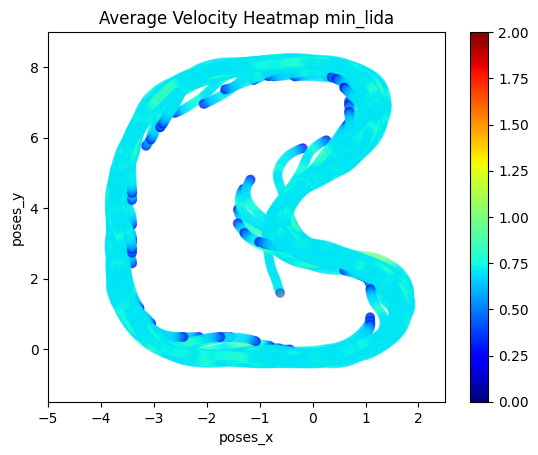

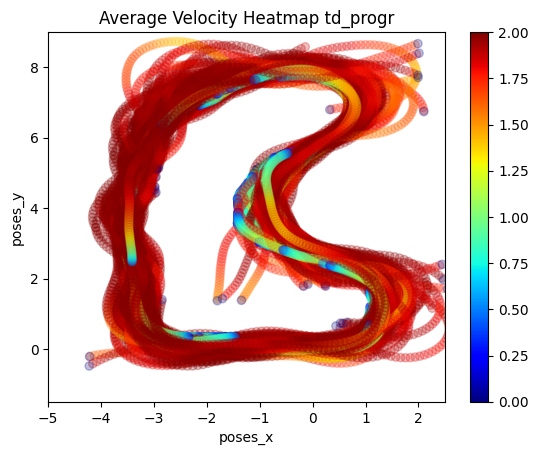

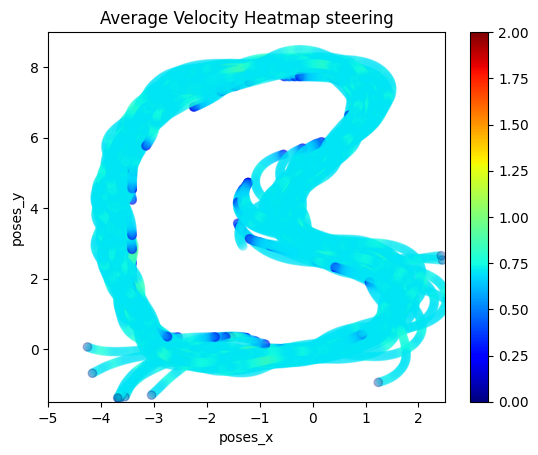

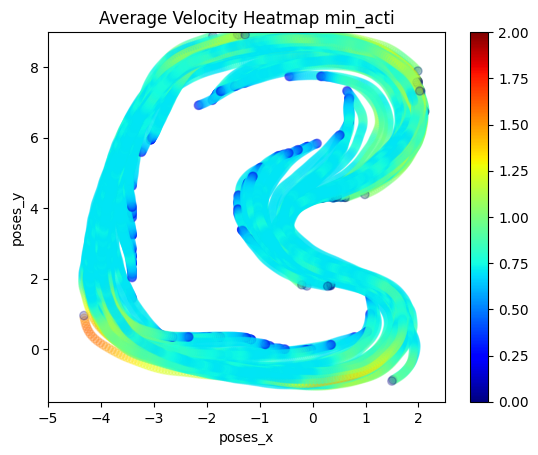

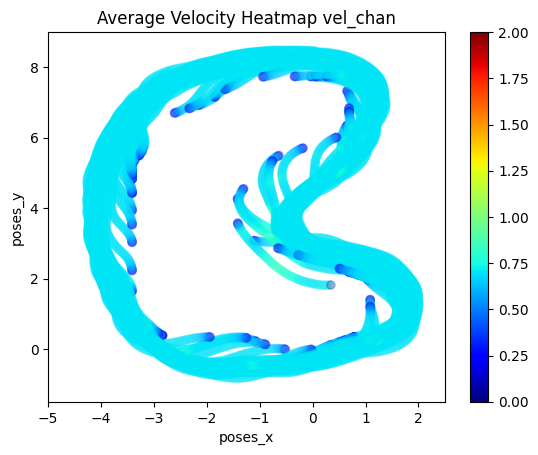

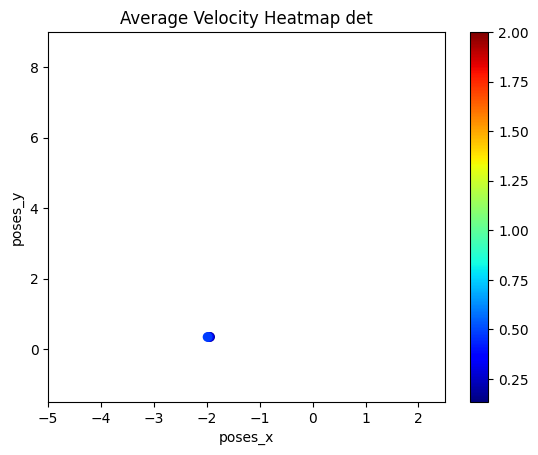

In [29]:



velocities = np.sqrt(np.array(root['observations']['linear_vels_x'])**2 + np.array(root['observations']['linear_vels_y'])**2)
start_idx = 0
for end_idx in change_indices:
    plot_average_velocity_heatmap(start_idx, end_idx, poses_x, poses_y, velocities)
    start_idx = end_idx

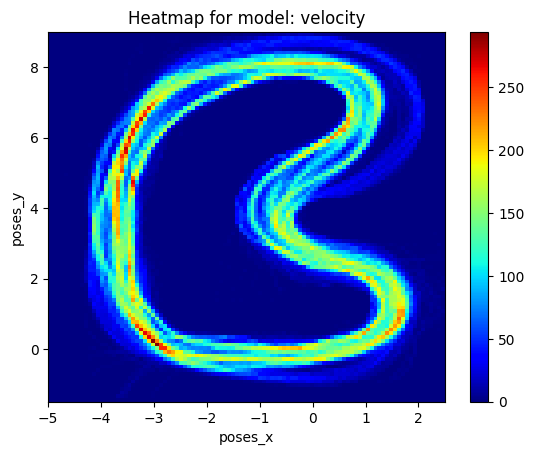

In [30]:
plot_heatmap(0, len(poses_x))

In [31]:
# number of collisions for each model
collisions = root['collision']
print("Number of collisions for each model:")
# loop over models:
start_idx = 0
for idx, change_idx in enumerate(change_indices):
    # count number of collisions for this model
    num_collisions = np.sum(collisions[start_idx:change_idx])
    print(f'{model_names[start_idx]}: {num_collisions}')
    start_idx = change_idx


Number of collisions for each model:
velocity: 22.0
raceline: 0.0
min_lida: 1.0
td_progr: 33.0
steering: 11.0
min_acti: 55.0
vel_chan: 1.0
det: 0.0


In [32]:
# for each model give the mean velocity
# print(root['observations'].getkeys())

print("Mean normalized velocity for each model:")
# loop over models:
start_idx = 0
for idx, change_idx in enumerate(change_indices):
    # count number of collisions for this model
    mean_velocity = np.mean(velocities[start_idx:change_idx])
    print(f'{model_names[start_idx]}: {mean_velocity} +- {np.std(velocities[start_idx:change_idx])}')
    start_idx = change_idx

Mean normalized velocity for each model:
velocity: 1.8217337131500244 +- 0.3694264888763428
raceline: 0.7061251997947693 +- 0.04134127125144005
min_lida: 0.7118932008743286 +- 0.04525025561451912
td_progr: 1.7780165672302246 +- 0.3648664355278015
steering: 0.7070134878158569 +- 0.044038377702236176
min_acti: 0.7744269371032715 +- 0.12774959206581116
vel_chan: 0.6982957720756531 +- 0.03384482488036156
det: 0.3167690932750702 +- 0.12810133397579193


In [33]:
print(change_indices)

[50172, 100598, 150840, 200941, 251283, 301611, 352232, 352236]


velocity
raceline
min_lida
td_progr
steering
min_acti
vel_chan
det


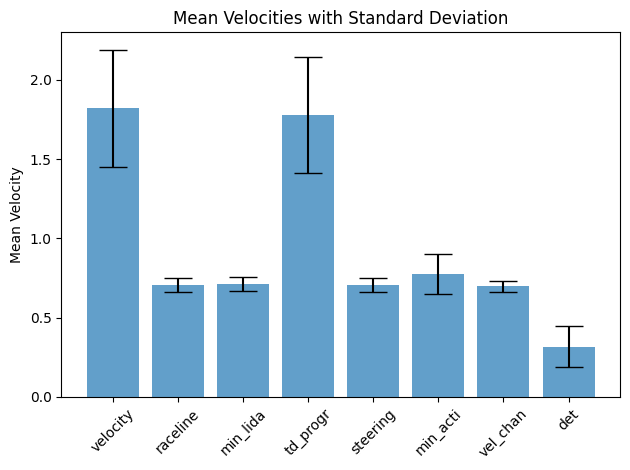

In [34]:

means = []
stds = []

start_idx = 0
model_names_ = []
for idx, change_idx in enumerate(change_indices):
    mean_velocity = np.mean(velocities[start_idx:change_idx])
    std_velocity = np.std(velocities[start_idx:change_idx])
    means.append(mean_velocity)
    stds.append(std_velocity)
    model_names_.append(model_names[start_idx])
    print(model_names[start_idx])
    start_idx = change_idx


# Plotting
plt.bar(model_names_, means, yerr=stds, align='center', alpha=0.7, ecolor='black', capsize=10)
plt.ylabel('Mean Velocity')
plt.title('Mean Velocities with Standard Deviation')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [1]:
# for each model the number of ored dones and truncates
print("Number of ores done and truncates for each model:")
done = root['done']
truncated = root['truncated']
done_or_truncated = np.logical_or(done, truncated)
start_idx = 0
# print("Discounted TD Reward")
for idx, change_idx in enumerate(change_indices):
    # count number of collisions for this model
    num_done_or_truncated = np.sum(done_or_truncated[start_idx:change_idx])
    print(f'{model_names[start_idx]}: {num_done_or_truncated}')
    start_idx = change_idx

Number of ores done and truncates for each model:


NameError: name 'root' is not defined

In [36]:
def calculate_discounted_reward(rewards, done, truncated, gamma=0.99):
    # combine done and truncated
    done_or_truncated = np.logical_or(done, truncated)
    # split into segments at done or truncated
    change_indices = np.where(done_or_truncated)[0] + 1 # catch the last segment
    # ensure that we dont access out of bounds, by checking if we are at the end
    change_indices[-1] = min(change_indices[-1], len(rewards)-1)
    # calculate discounted reward for each segment
    start_idx = 0
    discounted_rewards = []
    for end_idx in change_indices:
        segment_rewards = rewards[start_idx:end_idx][30:]
        #print(len(segment_rewards))
        discounted_reward = np.sum(segment_rewards * gamma ** np.arange(len(segment_rewards)))
        # print(f'Discounted reward: {discounted_reward}')
        discounted_rewards.append(discounted_reward)
        start_idx = end_idx
    return np.mean(discounted_rewards), np.std(discounted_rewards)

In [37]:
# for each model calculate the mean discounted reward
start_idx = 0
print("Discounted TD Reward")
gamma = 0.95
means = []
stds = []
for idx, change_idx in enumerate(change_indices): # this is for each model
    # count number of collisions for this model
    try:
        mean_discounted_reward, std_discounted = calculate_discounted_reward(root['new_rewards'][start_idx:change_idx],
                                    root['done'][start_idx:change_idx],
                                    root['truncated'][start_idx:change_idx], gamma=gamma)
        print(f'{model_names[start_idx]}: {mean_discounted_reward} +- {std_discounted} ({mean_discounted_reward* (1-gamma)} +- {std_discounted * (1-gamma)})')
        means.append(mean_discounted_reward)
        stds.append(std_discounted)
        start_idx = change_idx
    except:
        print(0)
        

Discounted TD Reward
velocity: 14.541973155794715 +- 1.8904164509753338 (0.7270986577897364 +- 0.09452082254876677)
raceline: 17.77127432852611 +- 1.0613947044358396 (0.8885637164263064 +- 0.05306973522179203)
min_lida: 13.898749383980386 +- 2.309562140342034 (0.6949374691990199 +- 0.1154781070171018)
td_progr: 16.10661106494761 +- 2.059693342396062 (0.8053305532473812 +- 0.10298466711980318)
steering: 13.29224939392919 +- 2.416741509463009 (0.66461246969646 +- 0.12083707547315056)
min_acti: 14.353795746155207 +- 2.251496768007871 (0.717689787307761 +- 0.11257483840039365)
vel_chan: 12.614014070857664 +- 2.0278634722939035 (0.6307007035428838 +- 0.10139317361469527)
det: 0.0 +- 0.0 (0.0 +- 0.0)


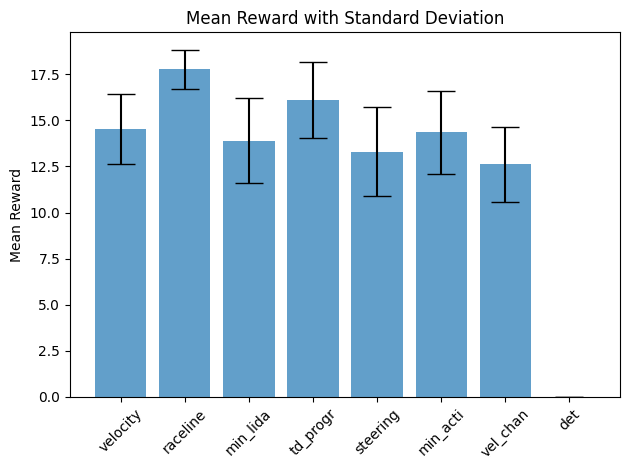

In [38]:
plt.bar(model_names_, means, yerr=stds, align='center', alpha=0.7, ecolor='black', capsize=10)
plt.ylabel('Mean Reward')
plt.title('Mean Reward with Standard Deviation')
plt.xticks(rotation=45)
plt.tight_layout()

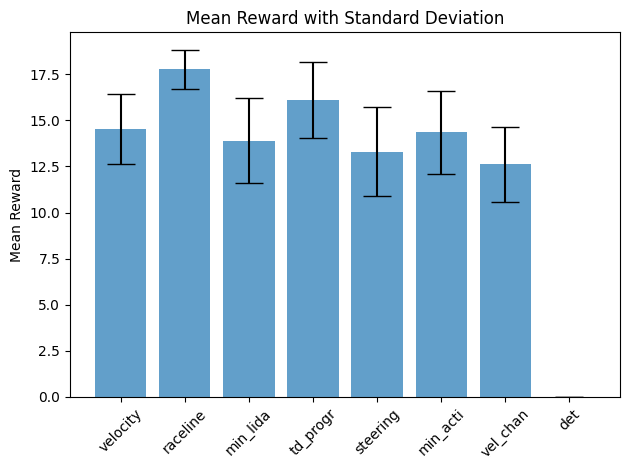

In [39]:
plt.bar(model_names_, means, yerr=stds, align='center', alpha=0.7, ecolor='black', capsize=10)
plt.ylabel('Mean Reward')
plt.title('Mean Reward with Standard Deviation')
plt.xticks(rotation=45)
plt.tight_layout()

In [40]:
# print the numbers of dones 
print("Number of dones:", np.sum(root['done']))
print("Number of truncated:", np.sum(root['truncated']))


Number of dones: 763
Number of truncated: 640


In [41]:
# print distance between truncated being true
truncated = root['truncated']
truncated_indices = np.where(np.array(root['truncated']) == True)[0]

In [42]:
# print diff truncated indices
print("Diff truncated indices:", np.diff(truncated_indices))

Diff truncated indices: [ 322  280  540  380  287  277  451  287  280  292  527  304  278  293
  271  281  288  292  287  280  304  403  299  276  304  285  291  280
  275  282  275  278  279  298  280  281  284  297  293  295  290  285
  281  296  302  527  274  287  309  294  292  279  288  289  459  312
  280  297  274  296  745  281  278  296  300  275  275  279  618  289
  275  281  483  286  282  281  294  296  296  290  296  312  269  291
  283  273  274  279  529  285  283  281  281  305  295  280  296  270
  290  434  285  492  294  296  314  301  274  589  279  292  292  285
  290  294  280  287  282  489  299  276  280  276  305  307  280  283
  287  295  277  282  288  287  279  292  279  279  401  296  296  283
  291  298  300  283  288  272  285  351  288  287  287  292  278  524
  299  275  438  297  534  657  658  649  650  660  659  652  658  650
  654  646  644  650  660  652  662  663  660  668  660  664  651  652
  656  654  651  653  648  656  652  654  658  650  6

In [43]:
import zarr

In [44]:
import numpy as np
import pickle as pkl
import os

In [45]:
with open(os.path.join("datasets", "progress"), 'rb') as f:
    all_timesteps = []
    rewards = []
    while True:
        # action, obs, reward, done, truncated, info, timesteps, model_name 
        try:
            timestep = pkl.load(f)
            all_timesteps.append(timestep)
            rewards.append(timestep[2])
        except EOFError:
            break

In [46]:
print(len(all_timesteps))

50117


In [47]:
numpy_rewards = np.array(rewards)

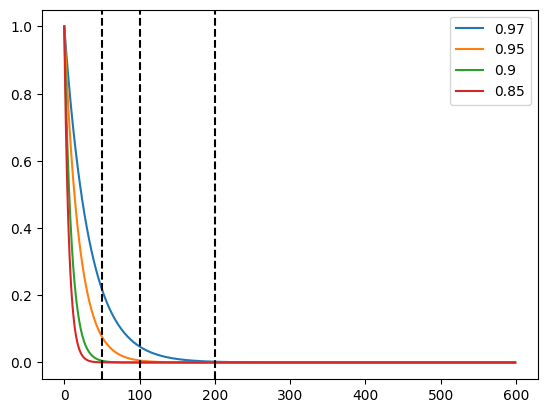

In [77]:
# plot discount = 0.99 over time
import matplotlib.pyplot as plt
import numpy as np
plt.plot(0.97 ** np.arange(600))
plt.plot(0.95 ** np.arange(600))
plt.plot(0.9 ** np.arange(600))
plt.plot(0.85 ** np.arange(600))
# plot vertical lines as 50, 100 , 200
plt.axvline(x=50, color='k', linestyle='--')
plt.axvline(x=100, color='k', linestyle='--')
plt.axvline(x=200, color='k', linestyle='--')
# add legend
plt.legend(['0.97', '0.95', '0.9', '0.85'])
# plt.plot(0.99 ** np.arange(1000))

In [60]:
def compute_trajectory_lengths(done, truncated):
    done_or_truncated = np.logical_or(done, truncated)
    # Add an ending point to ensure the last trajectory is considered
    # done_or_truncated = np.append(done_or_truncated, [1])
    lengths = []
    count = 0
    for flag in done_or_truncated:
        if flag:
            lengths.append(count + 1)
            count = 0
        else:
            count += 1
    return lengths

Statistics for each model:
velocity:
	Mean Length: 275.6703296703297
	Standard Deviation: 39.32662743188186
	Min Length: 78
	Max Length: 322

raceline:
	Mean Length: 654.8831168831168
	Standard Deviation: 6.383774126895584
	Min Length: 636
	Max Length: 668

min_lida:
	Mean Length: 717.7428571428571
	Standard Deviation: 32.48942057008084
	Min Length: 464
	Max Length: 757

td_progr:
	Mean Length: 259.59067357512953
	Standard Deviation: 37.646478219671806
	Min Length: 95
	Max Length: 319

steering:
	Mean Length: 637.2405063291139
	Standard Deviation: 203.1108206074824
	Min Length: 80
	Max Length: 759

min_acti:
	Mean Length: 541.1612903225806
	Standard Deviation: 216.14850979478695
	Min Length: 71
	Max Length: 786

vel_chan:
	Mean Length: 744.4264705882352
	Standard Deviation: 82.44683067009461
	Min Length: 76
	Max Length: 783

det:
	Mean Length: 4.0
	Standard Deviation: 0.0
	Min Length: 4
	Max Length: 4

8
8
8


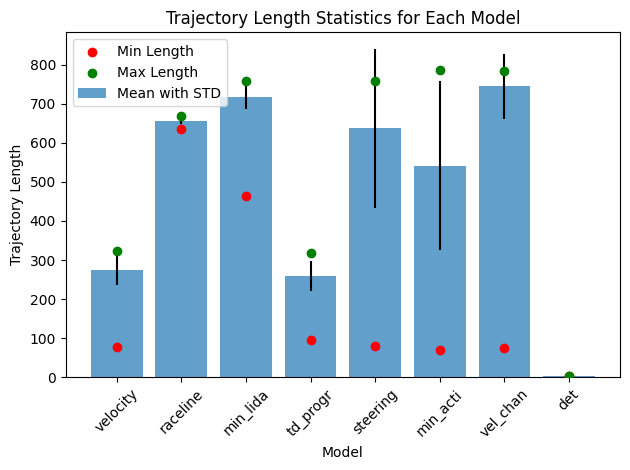

In [66]:
done = root['done']
truncated = root['truncated']

start_idx = 0

# Lists for plotting
means = []
std_devs = []
mins = []
maxs = []

print("Statistics for each model:")
for idx, change_idx in enumerate(change_indices):
    current_lengths = compute_trajectory_lengths(done[start_idx:change_idx], truncated[start_idx:change_idx])

    mean_length = np.mean(current_lengths)
    std_dev = np.std(current_lengths)
    min_length = np.min(current_lengths)
    max_length = np.max(current_lengths)

    print(f"{model_names[start_idx]}:")
    print(f"\tMean Length: {mean_length}")
    print(f"\tStandard Deviation: {std_dev}")
    print(f"\tMin Length: {min_length}")
    print(f"\tMax Length: {max_length}\n")

    # Add values to lists for plotting
    means.append(mean_length)
    std_devs.append(std_dev)
    mins.append(min_length)
    maxs.append(max_length)

    start_idx = change_idx

# Plotting
x = np.arange(len(np.unique(model_names)))
print(len(means))
print(len(std_devs))
print(len(x))
plt.bar(x, means, yerr=std_devs, label='Mean with STD', alpha=0.7)
plt.scatter(x, mins, color='red', label='Min Length', zorder=3)
plt.scatter(x, maxs, color='green', label='Max Length', zorder=3)

plt.xlabel('Model')
plt.ylabel('Trajectory Length')
plt.title('Trajectory Length Statistics for Each Model')
plt.xticks(x, model_names_, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()